### References : 

* **https://www.youtube.com/watch?v=RGfeGRt32Dk&ab_channel=DataProfessor**
* **https://github.com/dataprofessor/code/blob/master/python/cheminformatics_predicting_solubility_2_2_PyCaret.ipynb**


In [42]:
# install pycaret
# pip install <package>==<version>

## 1.0 Importing Required Libraries and dataset : 

In [1]:
import pandas as pd
import numpy as np
from pycaret import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

In [2]:
# df = pd.read_csv('C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\\Delaney_with_descriptors_2.csv')

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df.head()
df.shape

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


(1144, 5)

## 2.0 Model Building : 

In [3]:
from pycaret.regression import *

In [4]:
# Model Setup : 

model = setup(data = df, target= 'logS', train_size= 0.8, silent= True)


Setup Succesfully Completed.


,Description,Value
0,session_id,8996
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1144, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 2.1 Model Comparision : 

In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.5382,0.5303,0.7262,0.8823,0.2110,0.0648,1.6279
1,Extra Trees Regressor,0.5198,0.5292,0.7244,0.8821,0.2121,0.1139,0.1443
2,Random Forest,0.5300,0.5474,0.7362,0.8782,0.2125,0.1024,0.2176
3,Gradient Boosting Regressor,0.5817,0.5912,0.7666,0.8687,0.2243,0.0446,0.0720
4,Light Gradient Boosting Machine,0.5623,0.5947,0.7673,0.8673,0.2240,0.0466,0.1234
5,Extreme Gradient Boosting,0.5860,0.5991,0.7706,0.8668,0.2275,0.0506,0.1268
6,AdaBoost Regressor,0.6978,0.8051,0.8942,0.8213,0.2438,0.0450,0.0675
7,Bayesian Ridge,0.7756,1.0209,1.0090,0.7724,0.2915,-0.1963,0.0035
8,Linear Regression,0.7750,1.0209,1.0090,0.7723,0.2918,-0.1933,0.0038
9,Ridge Regression,0.7751,1.0209,1.0090,0.7723,0.2917,-0.1939,0.0026


* **As ET Regressor has the best R-squared values, we proceed with the ET Regressor**

## 2.2 Model Creation : 

In [6]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4565,0.3960,0.6293,0.9111,0.2043,-0.2076
1,0.5207,0.5121,0.7156,0.8759,0.2226,-0.2366
2,0.5597,0.7045,0.8393,0.8322,0.2241,0.5135
3,0.5147,0.4641,0.6812,0.8861,0.2057,-0.2763
4,0.5728,0.6507,0.8067,0.8499,0.2151,-0.0494
5,0.5108,0.5024,0.7088,0.9056,0.2207,1.9300
6,0.4746,0.4281,0.6543,0.9026,0.1980,-0.3471
7,0.4991,0.4661,0.6827,0.9014,0.1958,0.0865
8,0.5477,0.6460,0.8037,0.8632,0.2137,-0.3304
9,0.5414,0.5219,0.7224,0.8929,0.2210,0.0562


## 2.3 Model Tuning : 

* **The learning parameters are subjected to optimization at this phase. Here, 10 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal.**

In [7]:
from pycaret.utils import version
version()

'2.1.2'

In [10]:
tuned_et = tune_model(et, optimize= 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4926,0.4163,0.6452,0.9065,0.2064,-0.5196
1,0.5364,0.4848,0.6963,0.8825,0.2253,-0.2940
2,0.5685,0.6523,0.8076,0.8446,0.2382,0.5181
3,0.5981,0.5565,0.7460,0.8634,0.2234,-0.3700
4,0.5763,0.5998,0.7745,0.8617,0.2243,-0.0229
5,0.5665,0.5440,0.7375,0.8978,0.2280,1.6489
6,0.4602,0.4051,0.6365,0.9078,0.1998,-0.3696
7,0.5217,0.4886,0.6990,0.8967,0.1959,-0.0186
8,0.5676,0.6737,0.8208,0.8573,0.2101,-0.1213
9,0.5564,0.5096,0.7139,0.8954,0.2114,0.0805


In [11]:
tuned_et

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=40, n_jobs=-1, oob_score=False,
                    random_state=8996, verbose=0, warm_start=False)

## 4.0 Model Analysis : 

### 4.1 Plot Model : 

### 4.1.1) Residuals Plot

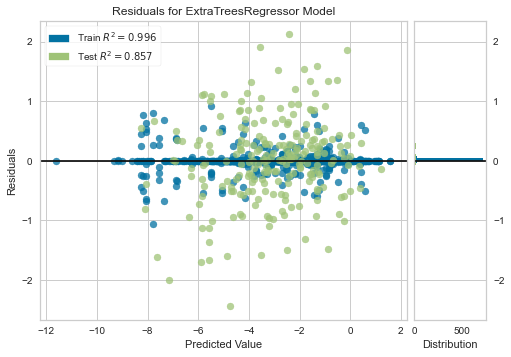

In [12]:
plot_model(et, 'residuals')


### 4.1.2 Prediction Erro Plot : 

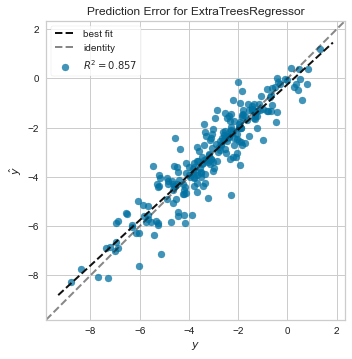

In [13]:
plot_model(et, 'error')

### 4.1.3 Cooks Distance Plot : to check for outliers

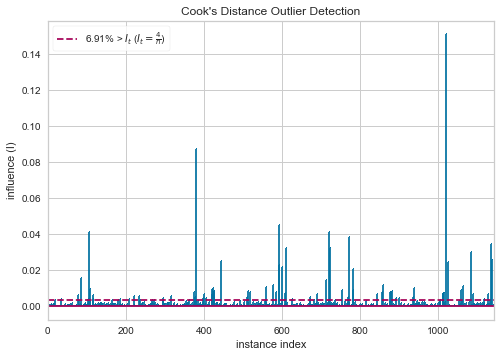

In [14]:
plot_model(et, 'cooks')

### 4.1.4 Recursive Feature Selection : 

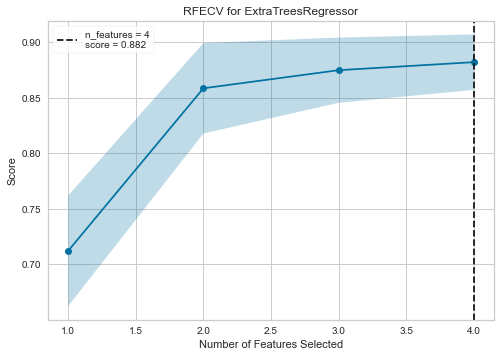

In [16]:
plot_model(et, 'rfe')

* **This plot tells us that the 2 out of 4 features explains almost 86% of the behaviour.**

* **The use of the other 2 descriptors do not provide much benefit and only slightly improve the prediction of the model.**

### 4.1.5 Learning Curve : 

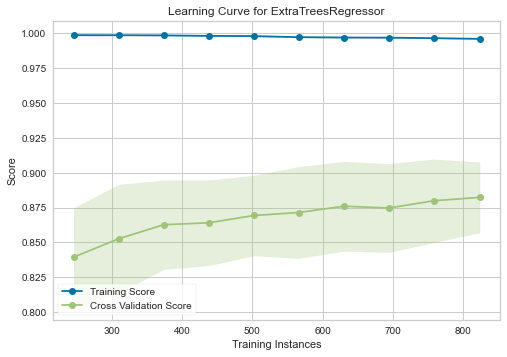

In [17]:
plot_model(et, 'learning')

### 4.1.6 Validation Curve : 

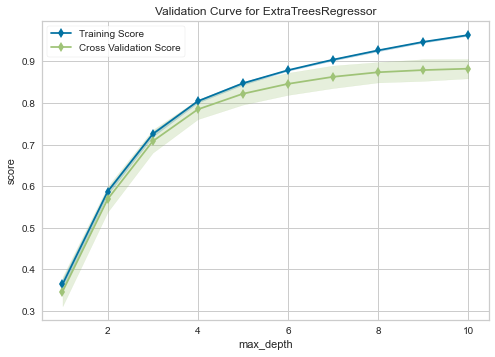

In [18]:
plot_model(et, 'vc')

### 4.1.7 Manifold Learning : 

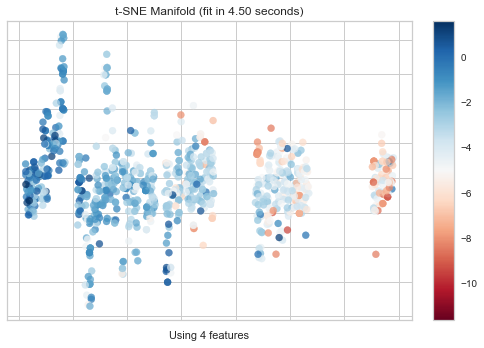

In [19]:
plot_model(et,'manifold')

### 4.1.8 Feature Importance : 

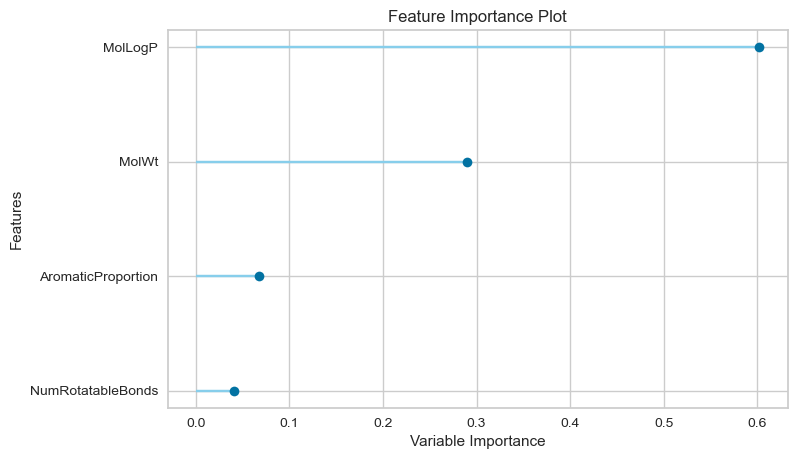

In [20]:
plot_model(et,'feature')

* **Most important features are : MolLopP and MolWt**

### 5.0 Model HyperParameters : 

In [21]:
plot_model(et,'parameter') # Hyperparameters of the base et model

,Parameters
bootstrap,False
ccp_alpha,0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


In [23]:
plot_model(tuned_et, 'parameter')  # # Hyperparameters of the base et model

,Parameters
bootstrap,False
ccp_alpha,0
criterion,mse
max_depth,90
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


## Show all plots : 

In [24]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## 5.0 Model Interpretaion : 

* **The interpret_model() function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the SHAP (SHapley Additive exPlanations) values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.**

### 5.0.1 Summary Plot : 

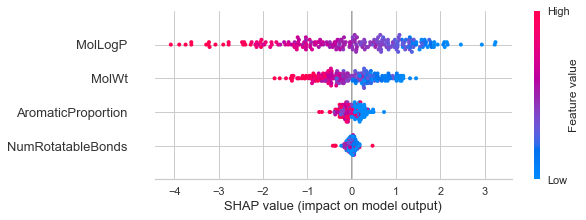

In [25]:
interpret_model(et)

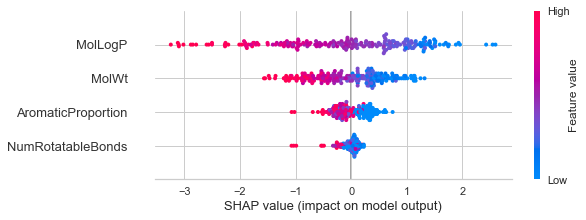

In [26]:
interpret_model(tuned_et)

### 5.0.2 Correlation Plot : 

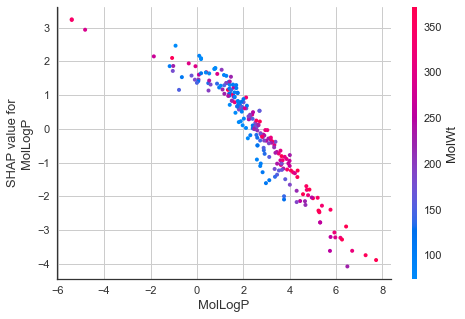

In [27]:
interpret_model(et, plot = 'correlation')

5.0.3 Reason Plot at Observation Level : 

* **The `Reason Plot` at Observation Level as called by PyCaret is better known as the `force plot` and this plot essentially describes the push and pull effect that each individual features has on the base value that eventually leads to the predicted `output value`.**

In [28]:
interpret_model(et, plot = 'reason', observation = 10)

* **This plot mainly shows that all the predictors are pushing the predicted value towards the negative i.e from a base value of -3038 towards -6.038.**
* **Thus, it can be stated that the predictors are having a negative affect.**

## 6.0 Testing the model on Test Data : 

In [31]:
prediction_holdout = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5337,0.5058,0.7112,0.8583,0.1925,-0.1514


In [32]:
prediction_holdout

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,1.57852,261.119,2.0,0.428571,-2.523,-2.7026
1,0.05860,128.156,0.0,0.750000,-2.273,-1.6070
2,1.75790,120.151,1.0,0.666667,-1.600,-1.2125
3,2.71412,365.842,2.0,0.500000,-3.780,-4.1755
4,3.21160,235.906,0.0,0.750000,-3.500,-3.8154
...,...,...,...,...,...,...
224,1.79130,122.993,1.0,0.000000,-1.730,-1.6875
225,2.97670,112.216,1.0,0.000000,-4.250,-4.2546
226,1.57720,266.098,1.0,0.800000,-3.127,-2.8236
227,1.76560,100.161,3.0,0.000000,-0.830,-1.4685


* **labels are the predicted values and logS are the actual values.**